## Atividade II - Hands on Introduction to Machine Learning

Aluno: Luis Felipe dos Santos Ribeiro
Rio de janeiro, 28 de março de 2022

1) Importação de pacotes

In [1]:
import pandas as pd
import numpy as np 
import scipy.io as sio 
import matplotlib.pyplot as plt 
from os import getcwd
from os.path import join 

2. Leitura de datasets

In [2]:
mat_contents = sio.loadmat('data3SS2009.mat')
dataset = mat_contents['dataset']
n_samples, n_channels, n_cases = dataset.shape # N, Chno, Nc
y = mat_contents['labels'].reshape(n_cases)

Ch1 = pd.DataFrame(dataset[:,0,:])
Ch2 = pd.DataFrame(dataset[:,1,:])
Ch3 = pd.DataFrame(dataset[:,2,:])
Ch4 = pd.DataFrame(dataset[:,3,:])
Ch5 = pd.DataFrame(dataset[:,4,:])

## Modelo Autoregressivo

Modelo autoregressivo para determinação de coeficientes para aproximação da curva:

- y(t) = c_0 + x1 * t1 + ... xn*tn, com n = número de lags

In [3]:
from statsmodels.tsa.ar_model import AutoReg
Feat = []
lags = 30
for i in range(0,n_cases):
    ar_model_Ch1 = AutoReg(Ch2[i].values, lags = lags).fit()
    ar_model_Ch2 = AutoReg(Ch3[i].values, lags = lags).fit()
    ar_model_Ch3 = AutoReg(Ch4[i].values, lags = lags).fit()
    ar_model_Ch4 = AutoReg(Ch5[i].values, lags = lags).fit()
    ar_models = np.concatenate([ar_model_Ch1.params, ar_model_Ch2.params, ar_model_Ch3.params, ar_model_Ch4.params])
    Feat.append(ar_models)


### Vericando o número de componentes principais -> "Curva de Cotovelo"

Text(0.5, 0, 'n_components')

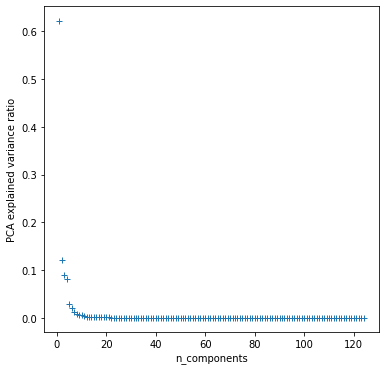

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA()
pca.fit(Feat)

# Plot the PCA spectrum
fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(6, 6))

ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")
ax0.set_xlabel("n_components")

# Redução da dimensionalidade - PCA

1. Redução para 2 dimensões:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit_transform(Feat)

np.shape(pca.components_)

(5, 124)

2. Redução para 3 dimensões

Text(0, 0.5, 'Componentes Principais Primários')

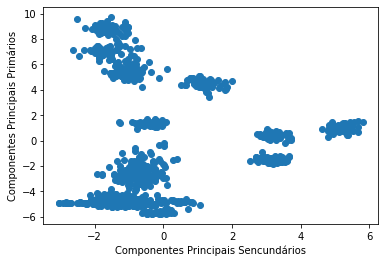

In [15]:
pca = PCA(n_components = 2).fit_transform(Feat)
plt.figure()
plt.subplot()
plt.scatter(pca[:,1], pca[:,0])
plt.xlabel('Componentes Principais Sencundários')
plt.ylabel('Componentes Principais Primários')

## Softmax Regression 

1. Novos pacotes

In [16]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

2. Escalando modelo para valores no intervalo (-1,1)

In [17]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
Feat_scaler = min_max_scaler.fit_transform(Feat)
Y = mat_contents['labels'].reshape(n_cases)

3. Criando o modelo:

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Feat_scaler, Y, test_size = 0.3, random_state = 0 )
modelo_tot = linear_model.LogisticRegression()
modelo_tot.fit(x_train, y_train)

c:\Users\luissantos\OneDrive - puc-rio.br\PhD\Diciplinas\MachineLearningProjects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

4. Predições e aferições quanto a qualidade do modelo:

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]
0.996078431372549


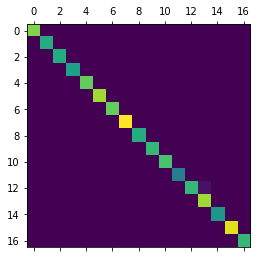

In [20]:
y_pred = modelo_tot.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
plt.matshow(cm)
print(cm) 
print(ac)

## Softmax usando outro método para escalar as variáveis:

c:\Users\luissantos\OneDrive - puc-rio.br\PhD\Diciplinas\MachineLearningProjects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]
0.996078431372549


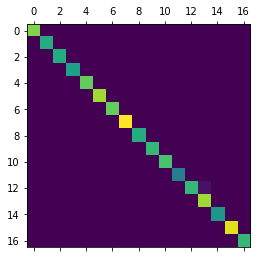

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = sc.fit_transform(Feat)

x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size = 0.3, random_state = 0 )
modelo_tot = linear_model.LogisticRegression()
modelo_tot.fit(x_train, y_train)

y_pred = modelo_tot.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
plt.matshow(cm)
print(cm) 
print(ac)

In [40]:
# 1 -> PCA
pca1 = PCA(n_components = 7)
pca1.fit(Feat)
x_pca = pca1.transform(Feat)
print("Original shape: {}".format(str(np.shape(Feat))))
print("Reduced shape: {}".format(str(np.shape(x_pca))))


Original shape: (850, 124)
Reduced shape: (850, 7)


c:\Users\luissantos\OneDrive - puc-rio.br\PhD\Diciplinas\MachineLearningProjects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  1  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 13  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]
0.9529411764705882


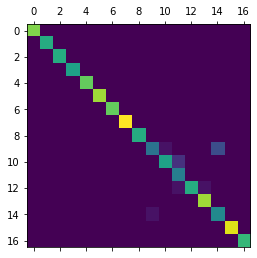

In [41]:
# 1 -> Scalling of PCA components matriz:
sc = StandardScaler()
df = sc.fit_transform(x_pca)

# 3 -> Setting train and test data
Y = mat_contents['labels'].reshape(n_cases)
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size = 0.3, random_state = 0 )
modelo_tot = linear_model.LogisticRegression()
modelo_tot.fit(x_train, y_train)

# 4 -> 
y_pred = modelo_tot.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
plt.matshow(cm)
print(cm) 
print(ac) 

c:\Users\luissantos\OneDrive - puc-rio.br\PhD\Diciplinas\MachineLearningProjects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luissantos\OneDrive - puc-rio.br\PhD\Diciplinas\MachineLearningProjects\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

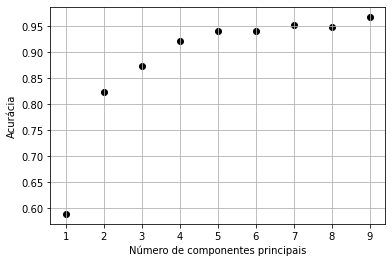

In [46]:
for i in range(1,10):
    pca1 = PCA(n_components = i)
    pca1.fit(Feat)
    x_pca = pca1.transform(Feat)
    
    Y = mat_contents['labels'].reshape(n_cases)
    x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size = 0.3, random_state = 0)
    modelo_tot = linear_model.LogisticRegression()
    modelo_tot.fit(x_train, y_train)
    y_pred = modelo_tot.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    plt.figure(1)
    plt.xlabel('Número de componentes principais')
    plt.ylabel('Acurácia')
    plt.grid()
    plt.scatter(i, ac, color = 'black') 